In [2]:
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
zomato_real=pd.read_csv("zomato.csv")

In [5]:
zomato_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
#Deleting Unnnecessary Columns
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)

#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})

#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float)
#Removing '/5' from Rates
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

## Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)


D:\Users\YASWANTH\anaconda3\envs\gr\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Users\YASWANTH\anaconda3\envs\gr\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
zomato

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,3.99
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,3.97
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.58
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.45
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41232,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar N Grill,False,False,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield,3.45
41233,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,False,False,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield,1.62
41234,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points By Sheraton Bengaluru...,False,False,3.6,27,Whitefield,Bar,Continental,1.5,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,3.32
41235,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2.5,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,4.23


In [8]:
location= zomato.location.unique()
location

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'Electronic City', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Koramangala 7th Block', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramangala 6th Block', 'Ma

In [9]:
zomato.corr(method ='spearman')

,online_order,book_table,rate,votes,cost,Mean Rating
online_order,1.000000,-0.054894,0.078493,0.159838,0.180865,0.070927
book_table,-0.054894,1.000000,0.446018,0.466304,-0.259121,0.452280
rate,0.078493,0.446018,1.000000,0.700950,-0.090199,0.946522
votes,0.159838,0.466304,0.700950,1.000000,0.027004,0.670111
cost,0.180865,-0.259121,-0.090199,0.027004,1.000000,-0.094218
Mean Rating,0.070927,0.452280,0.946522,0.670111,-0.094218,1.000000


In [10]:
mk=zomato.corr(method ='kendall')
mk

,online_order,book_table,rate,votes,cost,Mean Rating
online_order,1.000000,-0.054894,0.066107,0.130885,0.152519,0.058549
book_table,-0.054894,1.000000,0.375637,0.381838,-0.218509,0.373346
rate,0.066107,0.375637,1.000000,0.534326,-0.060617,0.864688
votes,0.130885,0.381838,0.534326,1.000000,0.033517,0.494741
cost,0.152519,-0.218509,-0.060617,0.033517,1.000000,-0.061348
Mean Rating,0.058549,0.373346,0.864688,0.494741,-0.061348,1.000000


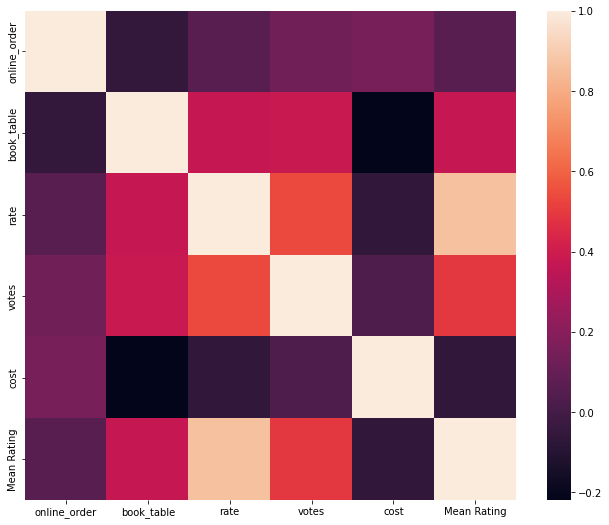

In [11]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(mk)
plt.show()

In [12]:
zomato["reviews_list"] = zomato["reviews_list"].str.lower()

## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))

## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_stopwords(text))

## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))

zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
28218,rated 30 ratedn decent place quick lunch offic...,Chinese
12203,rated 50 ratedn best chinese food price opinio...,"Chinese, North Indian"
20491,rated 40 ratedn loved food found little spicya...,"Andhra, Biryani, North Indian, Chinese"
35180,rated 20 ratedn went place visiting friend how...,"Fast Food, Burger"
13911,rated 10 ratedn bad cant give zero reviewnnord...,"South Indian, North Indian, Chinese"


In [13]:
restaurant_names = list(zomato['name'].unique())
def get_top_words(column, top_nu_of_words, nu_of_word):
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    bag_of_words = vec.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_nu_of_words]
    
zomato=zomato.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)
import pandas

# Randomly sample 60% of your dataframe
df_percent = zomato.sample(frac=0.5)

In [ ]:
df_percent

In [ ]:
with open('df_percent.csv', 'w', encoding='utf-8') as f:
    df_percent.to_csv(f)

In [15]:
from sklearn.metrics.pairwise import linear_kernel

df_percent.set_index('name', inplace=True)
indices = pd.Series(df_percent.index)

# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [54]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    df_new['name'] = df_new.index
    df_new = df_new.reset_index(drop=True)[['name', 'cuisines', 'Mean Rating', 'cost']]
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new

df_new2= recommend('Fast And Fresh')

TOP 10 RESTAURANTS LIKE Fast And Fresh WITH SIMILAR REVIEWS: 


In [55]:
df_new2

,name,cuisines,Mean Rating,cost
0,Eggzotic,"North Indian, Chinese, Biryani, Fast Food",3.77,500.0
1,Al Sadique,"North Indian, Mughlai, Chinese, Rolls",3.71,450.0
2,Four Seasons Fast Food Center,"North Indian, Chinese, Biryani",3.49,400.0
3,Sri Krishna Sagar,South Indian,3.26,300.0
4,Sri Krishna Sagar,"South Indian, North Indian, Chinese, Street Food",3.26,300.0
5,Desi Dhaba,"North Indian, Chinese",3.19,400.0
6,Konaseema Grand,"North Indian, Mughlai, Andhra, Biryani",2.87,1.0
7,Biriyani Nights,"Biryani, Kebab, Continental",2.66,500.0
8,Sri Lakshmi Dhaba,North Indian,2.50,250.0
9,Yummy Punjabi,"North Indian, Chinese",2.50,400.0


In [20]:
pip install pickle5

In [43]:
import pickle

In [44]:
file = open("res.pkl", 'wb')
pickle.dump(df_new2, file)

In [45]:
df_new2.to_dict()

{'name': {0: 'Cinnamon',
  1: 'Kakaji',
  2: 'Agarwal Food Service',
  3: "Swad 'E' Punjab",
  4: 'Desi Dhaba',
  5: 'Punjabi Tasty Khana',
  6: 'Taza Khaana',
  7: 'Sri Lakshmi Dhaba',
  8: 'Yummy Punjabi',
  9: 'Indian Food'},
 'cuisines': {0: 'North Indian, Chinese, Biryani',
  1: 'North Indian',
  2: 'North Indian, Chinese, Biryani',
  3: 'North Indian, Chinese, Mughlai',
  4: 'Chinese, North Indian',
  5: 'North Indian, Chinese, Biryani',
  6: 'Chinese, North Indian',
  7: 'North Indian',
  8: 'North Indian, Chinese',
  9: 'North Indian, Biryani, Chinese, Momos'},
 'Mean Rating': {0: 3.62,
  1: 3.45,
  2: 3.39,
  3: 3.32,
  4: 3.19,
  5: 2.68,
  6: 2.63,
  7: 2.5,
  8: 2.5,
  9: 2.42},
 'cost': {0: 550.0,
  1: 350.0,
  2: 400.0,
  3: 500.0,
  4: 300.0,
  5: 450.0,
  6: 450.0,
  7: 250.0,
  8: 400.0,
  9: 450.0}}

In [56]:
pickle.dump(cosine_similarities,open("cosine_similarities.pkl","wb"))